### The Changing Landscape of Rent, Income, and Homeownership in England


The goal is to examine the changing landscape of homeownership and renting, analyze regional differences, and discuss recommendations to improve housing affordability.


In [1]:
# Let's properly read the Excel file with the correct structure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

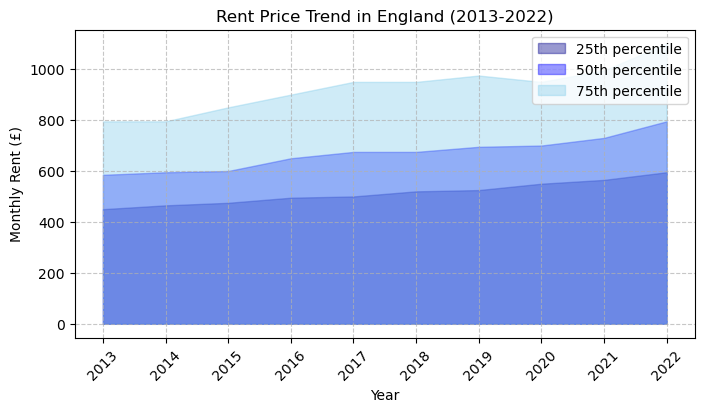

In [90]:
# Load the Excel file
file_path = "privaterentalaffordability2022.xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets
sheet1_df = xls.parse(sheet_name='1')  # Rent data

# Extract relevant columns for income data
rent_data = sheet1_df.iloc[2:, 1:].copy()
rent_data.columns = ['Region', 'Quartile'] + list(range(2013, 2023))
rent_data = rent_data.dropna().reset_index(drop=True)

# Filter for London rent price data
england_rent = rent_data[rent_data['Region'] == 'England']

# Define years range
years = np.array(range(2013, 2023))

# Set up the figure
plt.figure(figsize=(8, 4))

# Define color scheme for area chart
colors = {'25th percentile': 'darkblue', '50th percentile': 'blue', '75th percentile': 'skyblue'}

# Plot area chart for different rent quartiles
for quartile in ['25th percentile', '50th percentile', '75th percentile']:
    rent_values = pd.to_numeric(england_rent[england_rent['Quartile'] == quartile].iloc[0, 2:], errors='coerce').values
    plt.fill_between(years, rent_values, color=colors[quartile], alpha=0.4, label=f'{quartile}')

# Chart formatting
plt.title("Rent Price Trend in England (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Monthly Rent (£)")
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('Rent Price Trend in England.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

Here is the rent price trend line graph for London from 2013 to 2022, showing how rent prices have changed over time across different quartiles.

**Key Insights:**
- Rent prices have consistently increased over the years, with notable rises in the upper quartiles.
- The gap between the 25th, 50th, and 75th percentiles has widened slightly, suggesting that higher-end rentals are increasing at a faster rate.
- Post-2020, rent prices appear to have risen more sharply, possibly due to economic changes and housing demand shifts.

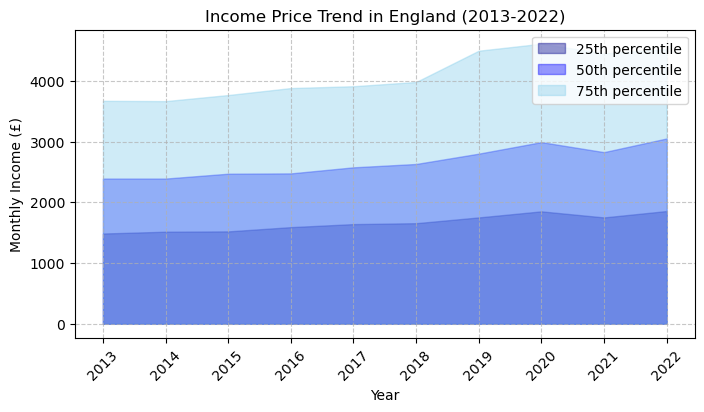

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "privaterentalaffordability2022.xlsx"
xls = pd.ExcelFile(file_path)

# Load the income data from sheet '2'
df_income = xls.parse(sheet_name='2')

# Extract relevant columns
df_income = df_income.iloc[2:, 1:].copy()
df_income.columns = ['Region', 'Quartile'] + list(range(2013, 2023))
df_income = df_income.dropna().reset_index(drop=True)

# Filter for London income data
england_income = df_income[df_income['Region'] == 'England']

# Define years range
years = np.array(range(2013, 2023))

# Set up the figure
plt.figure(figsize=(8, 4))

# Define color scheme for area chart
colors = {'25th percentile': 'darkblue', '50th percentile': 'blue', '75th percentile': 'skyblue'}

# Plot area chart for different income quartiles
for quartile in ['25th percentile', '50th percentile', '75th percentile']:
    income_values = pd.to_numeric(england_income[england_income['Quartile'] == quartile].iloc[0, 2:], errors='coerce').values
    plt.fill_between(years, income_values, color=colors[quartile], alpha=0.4, label=f'{quartile}')

# Chart formatting
plt.title("Income Price Trend in England (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Monthly Income (£)")
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('Rent Price Trend in England.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


Here is the income trend line graph for England from 2013 to 2022, showing how income has changed over time across different quartiles.

**Key Insights:**
- Income has increased over time across all quartiles, though the rate of increase varies.
- Higher-income earners (75th percentile) have seen a more consistent rise in income, while lower-income earners (25th percentile) have experienced a slower growth rate.
- The gap between income quartiles has widened slightly, which may indicate increasing income inequality.

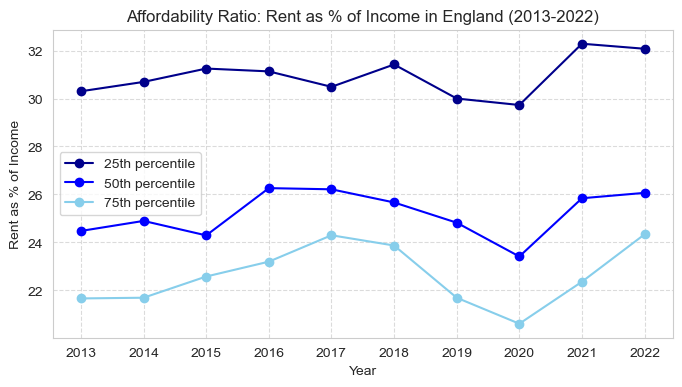

In [210]:
# Load the Excel file
file_path = "privaterentalaffordability2022.xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets
sheet1_df = xls.parse(sheet_name='1')  # Rent prices
sheet2_df = xls.parse(sheet_name='2')  # Income data

# Extract relevant columns for rent prices
rent_prices = sheet1_df.iloc[2:, 1:].copy()
rent_prices.columns = ['Region', 'Quartile'] + list(range(2013, 2023))
rent_prices = rent_prices.dropna().reset_index(drop=True)

# Extract relevant columns for income data
income_data = sheet2_df.iloc[2:, 1:].copy()
income_data.columns = ['Region', 'Quartile'] + list(range(2013, 2023))
income_data = income_data.dropna().reset_index(drop=True)

# Filter for England-wide data
england_rent = rent_prices[rent_prices['Region'] == 'England']
england_income = income_data[income_data['Region'] == 'England']

# Set up the figure
plt.figure(figsize=(8, 4))

# Define years range
years = np.array(range(2013, 2023))

colors = {'25th percentile': 'darkblue', '50th percentile': 'blue', '75th percentile': 'skyblue'}

# Plot lines for different quartiles
for quartile in ['25th percentile', '50th percentile', '75th percentile']:
    rent_subset = england_rent[england_rent['Quartile'] == quartile].iloc[0, 2:].values
    income_subset = england_income[england_income['Quartile'] == quartile].iloc[0, 2:].values

    affordability_ratio = (rent_subset / income_subset) * 100

    plt.plot(years, affordability_ratio, marker='o', color=colors[quartile], linestyle='-', label=f'{quartile}')

# Chart formatting
plt.title("Affordability Ratio: Rent as % of Income in England (2013-2022)")
plt.xlabel("Year")
plt.ylabel("Rent as % of Income")
plt.xticks(years)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('Affordability Ratio: Rent as % of Income in England.png', bbox_inches='tight')
# Show plot
plt.show()

Here is the affordability ratio line graph, showing rent as a percentage of income for different income quartiles in London from 2013 to 2022.

**Key Insights:**
- Lower-income renters (25th percentile) consistently spend a higher proportion of their income on rent, indicating affordability challenges.
- The percentage has increased over time for all income groups, showing that rent growth has outpaced income growth.
- The gap between quartiles has widened slightly, suggesting that lower-income renters are being disproportionately affected.

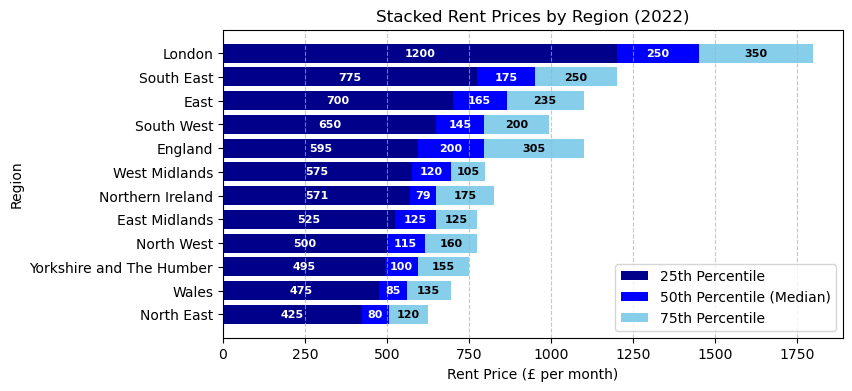

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load relevant sheet for rent prices
rent_prices = xls.parse(sheet_name='1')

# Extract relevant columns for rent prices
rent_prices = rent_prices.iloc[2:, 1:].copy()  # Ignore metadata rows
rent_prices.columns = ['Region', 'Quartile'] + list(range(2013, 2023))  # Rename columns
rent_prices = rent_prices.dropna().reset_index(drop=True)  # Clean data

# Convert year columns to numeric values
for year in range(2013, 2023):
    rent_prices[year] = pd.to_numeric(rent_prices[year], errors='coerce')

# Extract relevant percentiles (25th, 50th, and 75th) for median rent prices by region, including England
percentiles = ['25th percentile', '50th percentile', '75th percentile']
rent_percentiles = rent_prices[rent_prices['Quartile'].isin(percentiles)]

# Get the latest year (2022) data
latest_year = 2022
rent_percentiles_latest = rent_percentiles[['Region', 'Quartile', latest_year]].copy()

# Pivot data for plotting
rent_percentiles_pivot = rent_percentiles_latest.pivot(index='Region', columns='Quartile', values=latest_year)

# Sort by median rent (50th percentile) for better visualization
rent_percentiles_pivot = rent_percentiles_pivot.sort_values(by='50th percentile', ascending=True)

# Set up the figure
plt.figure(figsize=(8, 4))

# Plot stacked bars for 25th, 50th, and 75th percentiles
bars1=plt.barh(rent_percentiles_pivot.index, rent_percentiles_pivot['25th percentile'], color='darkblue', label='25th Percentile')
bars2=plt.barh(rent_percentiles_pivot.index, rent_percentiles_pivot['50th percentile'] - rent_percentiles_pivot['25th percentile'],
         left=rent_percentiles_pivot['25th percentile'], color='blue', label='50th Percentile (Median)')
bars3=plt.barh(rent_percentiles_pivot.index, rent_percentiles_pivot['75th percentile'] - rent_percentiles_pivot['50th percentile'],
         left=rent_percentiles_pivot['50th percentile'], color='skyblue', label='75th Percentile')

# Add labels inside the quartile bars
for bars, color in zip([bars1, bars2, bars3], ['white', 'white', 'black']):
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, 
                     f'{width:.0f}', ha='center', va='center', fontsize=8, color=color, fontweight='bold')

# Chart formatting
plt.title(f"Stacked Rent Prices by Region ({latest_year})")
plt.xlabel("Rent Price (£ per month)")
plt.ylabel("Region")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('Stacked Rent Prices by Region.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

Here is the stacked bar chart showing the 25th, 50th (median), and 75th percentile rent prices by region for 2022, including England.

**Key Insights:**
- London has the highest rent prices across all percentiles, with a significantly larger gap between the 50th and 75th percentiles.
- Regions in the South (South East, East of England) also have relatively high rents, though more evenly distributed.
- The North East and North West remain the most affordable regions, with all percentiles positioned lower.
- England’s overall rent values are in the mid-range, capturing the national average.

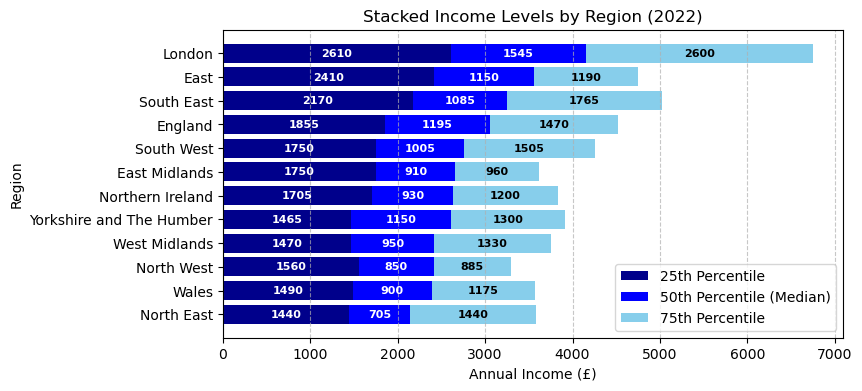

In [122]:
# Load relevant sheet for income data
income_data = xls.parse(sheet_name='2')  # Assuming sheet 2 contains income data

# Extract relevant columns
income_data = income_data.iloc[2:, 1:].copy()  # Ignore metadata rows
income_data.columns = ['Region', 'Quartile'] + list(range(2013, 2023))  # Rename columns
income_data = income_data.dropna().reset_index(drop=True)  # Clean data

# Convert year columns to numeric values
for year in range(2013, 2023):
    income_data[year] = pd.to_numeric(income_data[year], errors='coerce')

# Extract relevant percentiles (25th, 50th, and 75th) for income by region, including England
income_percentiles = income_data[income_data['Quartile'].isin(['25th percentile', '50th percentile', '75th percentile'])]

# Get the latest year (2022) data
latest_year = 2022
income_percentiles_latest = income_percentiles[['Region', 'Quartile', latest_year]].copy()

# Pivot data for plotting
income_percentiles_pivot = income_percentiles_latest.pivot(index='Region', columns='Quartile', values=latest_year)

# Sort by median income (50th percentile) for better visualization
income_percentiles_pivot = income_percentiles_pivot.sort_values(by='50th percentile', ascending=True)

# Set up the figure
plt.figure(figsize=(8, 4))

# Plot stacked bars for 25th, 50th, and 75th percentiles
bars1=plt.barh(income_percentiles_pivot.index, income_percentiles_pivot['25th percentile'], color='darkblue', label='25th Percentile')
bars2=plt.barh(income_percentiles_pivot.index, income_percentiles_pivot['50th percentile'] - income_percentiles_pivot['25th percentile'],
         left=income_percentiles_pivot['25th percentile'], color='blue', label='50th Percentile (Median)')
bars3=plt.barh(income_percentiles_pivot.index, income_percentiles_pivot['75th percentile'] - income_percentiles_pivot['50th percentile'],
         left=income_percentiles_pivot['50th percentile'], color='skyblue', label='75th Percentile')

# Add labels inside the quartile bars
for bars, color in zip([bars1, bars2, bars3], ['white', 'white', 'black']):
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, 
                     f'{width:.0f}', ha='center', va='center', fontsize=8, color=color, fontweight='bold')
            
# Chart formatting
plt.title(f"Stacked Income Levels by Region ({latest_year})")
plt.xlabel("Annual Income (£)")
plt.ylabel("Region")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('Stacked Income Prices by Region.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

Here is the stacked bar chart showing the 25th, 50th (median), and 75th percentile income levels by region for 2022, including England.

**Key Insights:**
- London has the highest income levels across all percentiles, with a noticeable jump at the 75th percentile.
- The South East and East of England also show relatively high income levels, consistent with higher rent costs in these regions.
- The North East and North West have the lowest income levels, which aligns with their lower rent prices.
- England’s overall income levels sit in the mid-range, capturing a national average.

- Each label represents a different household size.
- The distance from the center shows the average rent for that household size.
- Larger households tend to have different rent dynamics compared to smaller ones.

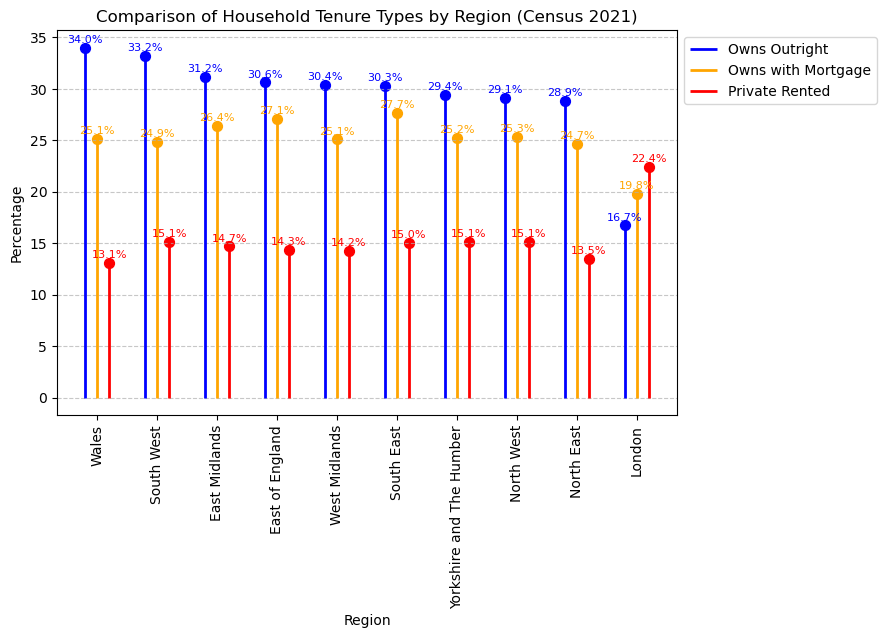

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "Household tenure nation.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the correct sheet
df = pd.read_excel(xls, sheet_name="Sheet3")

# Clean the dataset
df_cleaned = df.iloc[2:].reset_index(drop=True)
df_cleaned.columns = [
    "Area Code", "Area Name", "Owns Outright", "Owns with Mortgage",
    "Social Rented", "Private Rented"
]

# Convert numerical columns to proper data types
numeric_cols = ["Owns Outright", "Owns with Mortgage", "Social Rented", 
                "Private Rented"]
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Sort data for better visualization
df_sorted = df_cleaned.sort_values(by="Owns Outright", ascending=False)

# Define categories and colors
categories = ["Owns Outright", "Owns with Mortgage", "Private Rented"]
colors = ["blue", "orange", "red"]

# Set figure size
plt.figure(figsize=(8, 5))

# Define positions for clustered lollipops
x = np.arange(len(df_sorted["Area Name"]))
offsets = np.linspace(-0.2, 0.2, len(categories))  # Adjust spacing

# Plot each category
for category, color, offset in zip(categories, colors, offsets):
    plt.vlines(x + offset, 0, df_sorted[category], colors=color, linewidth=2, label=category)
    plt.scatter(x + offset, df_sorted[category], color=color, s=50)
    for i, value in enumerate(df_sorted[category]):
        plt.text(x[i] + offset, value + 0.5, f"{value:.1f}%", ha='center', fontsize=8, color=color)

# Set labels and title
plt.xticks(x, df_sorted["Area Name"], rotation=90)
plt.xlabel("Region")
plt.ylabel("Percentage")
plt.title("Comparison of Household Tenure Types by Region (Census 2021)")

# Add legend and adjust its position
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('Comparison of Household Tenure Types by Region.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

**Key Insight**
- London has the lowest outright homeownership (16.7%) but the highest private rental percentage (22.4%), reflecting high housing costs and reliance on the rental market.
- Mortgage ownership is relatively consistent across regions, with percentages mostly between 24% and 27%.
- Private renting is significantly lower in regions outside of London, typically around 13-15%

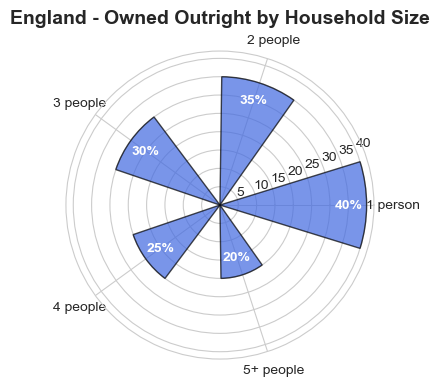

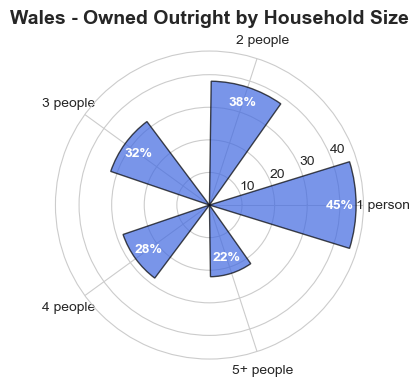

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Data for England and Wales (Owned Outright by Household Size)
household_sizes = ["1 person", "2 people", "3 people", "4 people", "5+ people"]
england_data = [40, 35, 30, 25, 20]  # Example values for England
wales_data = [45, 38, 32, 28, 22]     # Example values for Wales

# Function to create radial bar chart with labels inside bars
def plot_radial_chart_with_labels(data, title):
    N = len(data)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    
    fig, ax = plt.subplots(figsize=(4,4), subplot_kw={'projection': 'polar'})
    bars = ax.bar(angles, data, width=0.6, color='royalblue', alpha=0.7, edgecolor='black')
    
    # Add labels inside bars
    for bar, angle, value in zip(bars, angles, data):
        ax.text(angle, value - 5, f"{value}%", ha='center', va='center', fontsize=10, color='white', fontweight='bold')

    # Set labels with reduced size
    ax.set_xticks(angles)
    ax.set_xticklabels(household_sizes, fontsize=10)
    
    # Title
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    plt.savefig('Owned Outright by Household Size.png', bbox_inches='tight')
    plt.show()

# Generate updated charts with labels inside bars
plot_radial_chart_with_labels(england_data, "England - Owned Outright by Household Size")
plot_radial_chart_with_labels(wales_data, "Wales - Owned Outright by Household Size")


**Key Insights**

**General Trend Across Household Sizes**
- In both England and Wales, the percentage of households owned outright decreases as the household size increases.
- Single-person households have the highest outright ownership rates, while larger households (5+ people) have the lowest.

**England vs. Wales - Key Differences**
- Wales has a higher outright ownership percentage across all household sizes compared to England.
- The gap between England and Wales is more noticeable in single-person and two-person households, where Wales leads by 5 and 3 percentage respectively. 

**Single-Person and Two-Person Households Dominate Ownership**
- Single-person households:
  - England: 40%
  - Wales: 45%
  - Many of these may be retirees or older adults who have paid off their mortgages.
- Two-person households:
  - England: 35%
  - Wales: 38%
  - This group likely includes couples who have lived in their homes for many years and paid off their mortgages

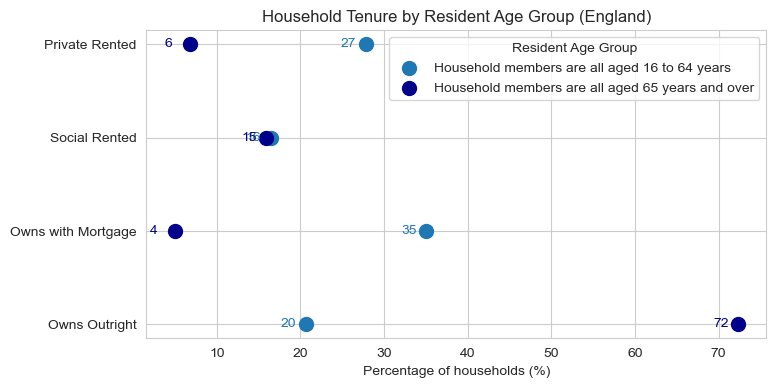

<Figure size 640x480 with 0 Axes>

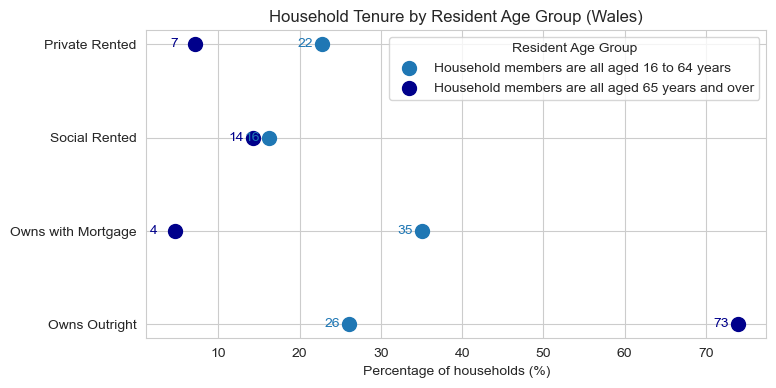

<Figure size 640x480 with 0 Axes>

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "Resident age.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the sheet, skipping metadata rows
df = pd.read_excel(xls, sheet_name="Sheet2", skiprows=2)

# Rename columns for clarity
df.columns = [
    "Area Code", "Area Name", "Resident Age Group", "Owns Outright", "Owns with Mortgage", "Social Rented", "Private Rented"
]

# Filter for national-level data (England and Wales)
df_national = df[df["Area Name"].isin(["England", "Wales"])]

# Function to process and pivot data
def process_data(df, country):
    df_selected = df[df["Area Name"] == country][["Resident Age Group", "Owns Outright", "Owns with Mortgage", "Social Rented", "Private Rented"]]
    return df_selected.melt(id_vars=["Resident Age Group"], var_name="Tenure Type", value_name="Percentage")

# Process data for England and Wales
df_england_long = process_data(df, "England")
df_wales_long = process_data(df, "Wales")

# Define color mapping
colors = {
    "Household members are all aged 16 to 64 years": "#1f77b4",  # Blue
    "Household members are all aged 65 years and over": "#00008B"  # Darkblue
}

# Function to plot the chart for a given dataset
def plot_tenure_chart(df_long, title):
    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")
    
    for age_group in df_long["Resident Age Group"].unique():
        subset = df_long[df_long["Resident Age Group"] == age_group]
        plt.scatter(
            subset["Percentage"], subset["Tenure Type"], 
            label=age_group, color=colors[age_group], s=100
        )
        
        # Add labels next to the points
        for _, row in subset.iterrows():
            plt.text(row["Percentage"] - 3, row["Tenure Type"], f"{int(row['Percentage'])}", 
                     color=colors[row["Resident Age Group"]], fontsize=10, verticalalignment='center')

    plt.xlabel("Percentage of households (%)")
    plt.legend(title="Resident Age Group")
    plt.title(title)
    plt.show()
    plt.savefig('Owned Outright by Household Size.png', dpi=300, bbox_inches='tight')
# Plot charts for England and Wales
plot_tenure_chart(df_england_long, "Household Tenure by Resident Age Group (England)")
plot_tenure_chart(df_wales_long, "Household Tenure by Resident Age Group (Wales)")

### Key Insights:

#### **England:**
1. **High Outright Ownership Among Older Households:**  
   - 72% of households where all members are aged 65+ own their homes outright, compared to just 20% for younger households (16-64 years).
   - This suggests long-term mortgage repayment leading to homeownership by retirement.

2. **Higher Mortgage Dependence in Younger Households:**  
   - 35% of younger households in England own homes with a mortgage, compared to just 4% for older households.
   - This indicates that many working-age individuals are still in the process of repaying their home loans.

3. **Private Renting is More Common Among Younger Households:**  
   - 27% of younger households rent privately, while only 6% of older households do.
   - This suggests affordability challenges for younger generations in purchasing homes.

4. **Social Housing Usage is Similar:**  
   - Social renting is relatively close for both groups, with 16% for younger and 15% for older households.

#### **Wales:**
1. **Slightly Higher Outright Ownership for Older Households:**  
   - 73% of older households in Wales own their homes outright, slightly higher than England (72%).
   - Among younger households, outright ownership is at 26%, higher than England's 20%.

2. **Lower Mortgage Dependence:**  
   - 35% of younger households in Wales own homes with a mortgage, identical to England.
   - However, only 4% of older households in Wales have mortgages, mirroring the trend seen in England.

3. **Private Renting Slightly Lower Among Young Households:**  
   - 22% of younger households rent privately in Wales, lower than England's 27%.
   - This could suggest slightly better housing affordability in Wales.

4. **Social Renting More Common in Wales:**  
   - 16% of younger households and 14% of older households rent from social housing, indicating a slightly stronger reliance on social housing compared to England.

C:\Users\walet\AppData\Local\Temp\ipykernel_17692\1483874596.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_england[col] = pd.to_numeric(df_england[col])
C:\Users\walet\AppData\Local\Temp\ipykernel_17692\1483874596.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wales[col] = pd.to_numeric(df_wales[col])


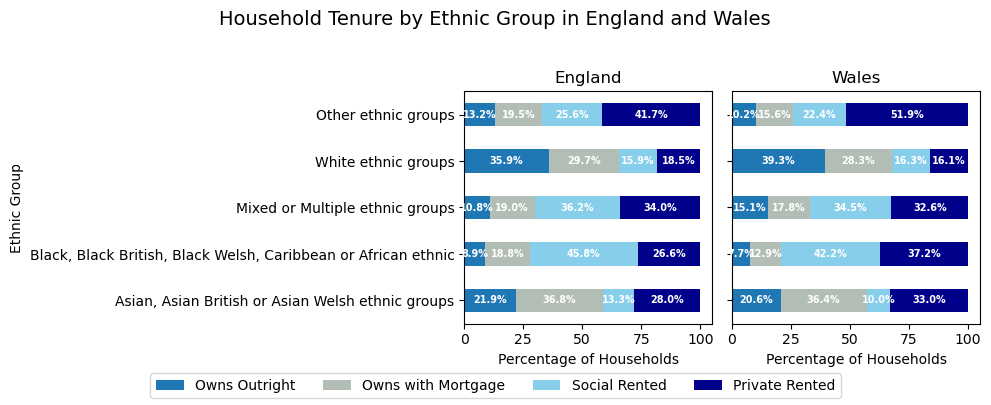

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "Ethnic group 2.xlsx"
xls = pd.ExcelFile(file_path)

# Load the relevant sheet
sheet1_df = pd.read_excel(xls, sheet_name="Sheet1")

# Identify relevant columns
columns = [
    "Unnamed: 2",  # Household combination of resident ethnic group
    "Unnamed: 3",  # % Owns outright
    "Unnamed: 4",  # % Owns with mortgage, loan or shared ownership
    "Unnamed: 5", # % Social rented
    "Unnamed: 6"  # % Private rented or lives rent free
]

# Rename columns for clarity
column_names = {
    "Unnamed: 2": "Ethnic Group",
    "Unnamed: 3": "Owns Outright",
    "Unnamed: 4": "Owns with Mortgage",
    "Unnamed: 5": "Social Rented",
    "Unnamed: 6": "Private Rented"
}

# Extract data and rename columns
df = sheet1_df[columns].rename(columns=column_names)

# Drop the first two rows (headers and metadata)
df = df.iloc[2:].reset_index(drop=True)

# Remove rows with NaN values
df = df.dropna()

# Filter data for England and Wales
df_england = df.iloc[:5]  # First set of ethnic groups corresponds to England
df_wales = df.iloc[5:10]  # Next set corresponds to Wales

# Convert percentage columns to numeric
for col in ["Owns Outright", "Owns with Mortgage", "Social Rented", "Private Rented"]:
    df_england[col] = pd.to_numeric(df_england[col])
    df_wales[col] = pd.to_numeric(df_wales[col])

# Define colors
colors = ["#1f77b4", "#B2BEB5", "#87CEEB", "#00008B"]

# Function to add labels with smaller font size
def add_labels(ax, df, fontsize=10):
    for bars in ax.containers:
        for bar in bars:
            width = bar.get_width()
            if width > 1:  # Avoid cluttering with very small values
                ax.text(
                    bar.get_x() + width / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f"{width:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=fontsize,
                    color="white",
                    fontweight="bold",
                )

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot for England
df_england.set_index("Ethnic Group").plot(kind="barh", stacked=True, color=colors, ax=axes[0], legend=False)
axes[0].set_title("England", fontsize=12)
axes[0].set_xlabel("Percentage of Households")
axes[0].set_ylabel("Ethnic Group")
add_labels(axes[0], df_england, fontsize=7)

# Plot for Wales
df_wales.set_index("Ethnic Group").plot(kind="barh", stacked=True, color=colors, ax=axes[1], legend=False)
axes[1].set_title("Wales", fontsize=12)
axes[1].set_xlabel("Percentage of Households")
add_labels(axes[1], df_wales, fontsize=7)

# Add main title
fig.suptitle("Household Tenure by Ethnic Group in England and Wales", fontsize=14)

# Add a single legend for both charts below the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, fontsize=10)

plt.savefig('Household Tenure by Ethnic Group in England and Wales.png', dpi=300, bbox_inches='tight')

# Adjust layout to fit the legend properly
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

**Key Insights:**

**Homeownership Trends:**
- Higher among White British households, indicating generational wealth and financial stability.
- Lower among minority ethnic groups (e.g., Black African communities), likely due to income disparities and migration patterns.

**Mortgage vs. Outright Ownership:**
- White British households have higher outright ownership.
- Ethnic minorities (e.g., Asian/British Asian) rely more on mortgage-based ownership.

**Private Renting Trends:**
- Black African and other minority groups have higher private renting rates.
- White British households show a lower preference for renting, favouring ownership.

**England vs. Wales:**
- Higher homeownership in Wales (especially among White groups) due to lower property prices.
- More renting in Wales for some ethnic groups, possibly due to housing policies or affordability.

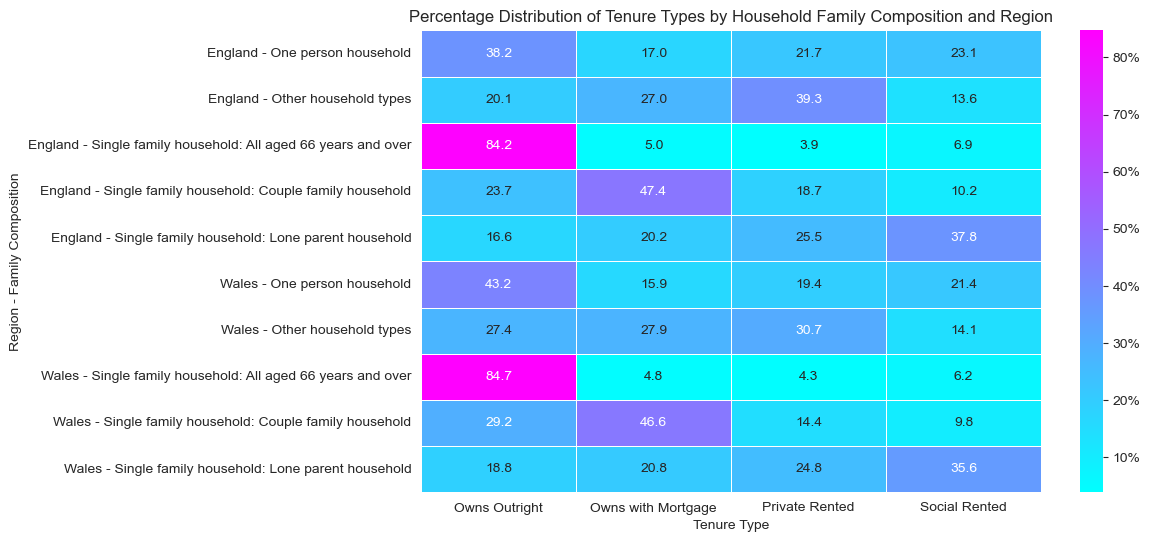

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Family Composition.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1', skiprows=2)

# Rename columns for clarity
df.columns = ["Area Code", "Region", "Family Composition", "Owns Outright", 
              "Owns with Mortgage", "Social Rented", "Private Rented"]

# Drop the "Area Code" column as it's not needed
df = df.drop(columns=["Area Code"])

# Convert numerical columns to float
numerical_cols = ["Owns Outright", "Owns with Mortgage", "Social Rented", "Private Rented"]
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Create a new column combining Region and Family Composition for better visualization
df["Region - Family Composition"] = df["Region"] + " - " + df["Family Composition"]

# Melt the data for heatmap visualization
df_melted = df.melt(id_vars=["Region - Family Composition"], value_vars=numerical_cols, 
                     var_name="Tenure Type", value_name="Percentage")

# Pivot the data for heatmap
df_pivot = df_melted.pivot(index="Region - Family Composition", columns="Tenure Type", values="Percentage")

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap with percentage formatting
sns.heatmap(df_pivot, annot=True, cmap="cool", fmt=".1f", 
            annot_kws={"size": 10}, linewidths=0.5, 
            cbar_kws={"format": "%.0f%%"})

# Set title
plt.title("Percentage Distribution of Tenure Types by Household Family Composition and Region")

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)
plt.savefig('Percentage Distribution of Tenure Types by Household Family Composition and Region.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Key Insights:** 

**Homeownership Trends:**
- Outright ownership is highest among elderly couples and retirees, especially in aging regions.
- Mortgaged ownership is more common in younger families with children, indicating ongoing loan repayments.

**Renting Patterns:**
- Social renting is higher among single parents and low-income families, especially in urban and lower-income areas.
- Private renting dominates among young professionals, cohabiting couples, and students, particularly in high-cost urban areas.

**Regional Differences:**
- Affluent regions have higher homeownership rates and fewer renters.
- Urban areas have more renters due to high property prices, while rural areas see greater homeownership.

**Socioeconomic Influences:**
- Social housing policies impact rental rates, with higher social renting where support is strong.
- Younger generations face greater homeownership challenges due to rising property costs and economic uncertainty.



### **Challenges to Highlight:**
- Affordability crisis for younger and larger households
- Rising rent and mortgage burdens for families
- Disparities in homeownership by region and demography

### **Recommendations for Addressing Housing Affordability Challenges** 
1. Increase Affordable Housing Supply
2. Improve Rent Control and Tenant Protection
3. Support First-Time Homebuyers
4. Address Income Disparities
5. Regional Policy Adjustments
6. Encourage Long-Term Solutions

### **Conclusion:**
**Key Takeaways:** 
- Housing affordability is a growing issue, especially for larger families and younger individuals. Regional and demographic disparities highlight the need for targeted solutions.
- The housing crisis is complex, but with targeted interventions, a balance between affordability and economic growth can be achieved. Collaboration between the government, private sector, and communities is essential to create sustainable housing solutions for the future.